In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

# classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Load Datasets

### Original Dataset

In [66]:
X = df = pd.read_csv(r'./../data/X.csv')
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1


In [67]:
X.shape

(17976, 20)

In [68]:
y = df = pd.read_csv(r'./../data/y.csv')
y.head()

,offer_accepted
0,No
1,No
2,No
3,No
4,No


In [69]:
y_int = pd.Series(y.offer_accepted)
y_int.unique()

array(['No', 'Yes'], dtype=object)

In [70]:
y_int = y_int.apply(lambda x: 0 if x == 'No' else 1)
y_int

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: offer_accepted, Length: 17976, dtype: int64

In [71]:
y_int.value_counts()

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

In [72]:
y_int.unique()

array([0, 1])

### X Variations

In [73]:
X_avgbal = X.drop(columns=(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']))
X_avgbal

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,5,167.50,2,0,0,1,0,1,0,1,0,0,1
17972,1,3,1,3,850.50,2,0,0,1,0,1,0,1,0,0,1
17973,1,2,1,4,1087.25,2,0,0,1,0,1,0,1,0,1,0
17974,1,4,2,2,1022.25,1,1,0,1,0,1,0,1,0,0,1


In [74]:
X_qr = X.drop('average_balance', axis=1)
X_qr

,bank_accounts_open,credit_cards_held,homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,1,1,5,136.0,65.0,71.0,398.0,2,0,0,1,0,1,0,1,0,0,1
17972,1,3,1,3,984.0,940.0,943.0,535.0,2,0,0,1,0,1,0,1,0,0,1
17973,1,2,1,4,918.0,767.0,1170.0,1494.0,2,0,0,1,0,1,0,1,0,1,0
17974,1,4,2,2,626.0,983.0,865.0,1615.0,1,1,0,1,0,1,0,1,0,0,1


### SMOTE dataset

In [75]:
smote_data = pd.read_csv(r'./../data/oversampled_data.csv')

In [76]:
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33910 entries, 0 to 33909
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bank_accounts_open        33910 non-null  float64
 1   credit_cards_held         33910 non-null  float64
 2   homes_owned               33910 non-null  float64
 3   household_size            33910 non-null  float64
 4   average_balance           33910 non-null  float64
 5   q1_balance                33910 non-null  float64
 6   q2_balance                33910 non-null  float64
 7   q3_balance                33910 non-null  float64
 8   q4_balance                33910 non-null  float64
 9   income_level              33910 non-null  float64
 10  credit_rating             33910 non-null  float64
 11  reward_Air Miles          33910 non-null  float64
 12  reward_Cash Back          33910 non-null  float64
 13  reward_Points             33910 non-null  float64
 14  mailer

In [77]:
X_sm = smote_data.drop('offer_accepted', axis=1)
X_sm

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,-0.007894,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,0.365992,1.406778,1.171654,-2.006040,-1.383443,-1.399945,-1.216592,-1.143719,-1.144176,0.230839,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744
33906,-0.541352,0.121161,-0.476212,-1.339703,0.509354,-0.090918,1.061438,0.733175,-0.216821,-1.420373,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
33907,-0.541352,-0.742960,-0.476212,-1.345162,0.100980,1.500388,0.608086,-0.670130,-1.245289,-0.445548,-0.850492,-0.711980,1.413683,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352
33908,-0.541352,0.121161,-0.476212,0.207690,0.117587,0.101837,0.098037,-0.168242,0.268133,0.376295,-0.337504,-0.711980,-0.707372,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744


In [78]:
y_sm = smote_data.iloc[:, -1]
y_sm = y_sm.map({'No': 0, 'Yes': 1})
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
33905    1
33906    1
33907    1
33908    1
33909    1
Name: offer_accepted, Length: 33910, dtype: int64

### Add random variable in X
- This variable will be useful when checking for feature importance. Every variable below it could most likely be dropped.

In [79]:
X['random'] = np.random.random(size=len(X))
X_avgbal['random'] = np.random.random(size=len(X_avgbal))
X_qr['random'] = np.random.random(size=len(X_qr))
X_sm['random'] = np.random.random(size=len(X_sm))

X_train['random'] = np.random.random(size=len(X_train))
Xavg_train['random'] = np.random.random(size=len(Xavg_train))
Xqr_train['random'] = np.random.random(size=len(Xqr_train))
Xsm_train['random'] = np.random.random(size=len(Xsm_train))


### X-y Split : Original Dataset

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.3, random_state=100)

In [81]:
y_train.value_counts()

offer_accepted
0    11862
1      721
Name: count, dtype: int64

In [82]:
y_test.value_counts()

offer_accepted
0    5093
1     300
Name: count, dtype: int64

### X-y Split : X Variations (For Logistic Regression)

In [83]:
Xavg_train, Xavg_test, yavg_train, yavg_test = train_test_split(X_avgbal, y_int, test_size=0.3, random_state=100) # no quarterly balance
Xqr_train, Xqr_test, yqr_train, yqr_test = train_test_split(X_qr, y_int, test_size=0.3, random_state=100) # no quarterly balance

### X-y Split : SMOTE Dataset

In [84]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [85]:
ysm_train.value_counts()

offer_accepted
1    11926
0    11811
Name: count, dtype: int64

In [86]:
ysm_test.value_counts()

offer_accepted
0    5144
1    5029
Name: count, dtype: int64

## Logistic Regression

In [87]:
def fit_classifier(X, y, model_type):
    '''choose model to apply
    'logistic_b' : classification binomial logistic regression
    'logistic_m' : classification multinomial logistic regression
    'knn' : k nearest neighbor classifier'''
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    if model_type == 'logistic_b':
        model = LogisticRegression(random_state=1, multi_class='ovr')
    elif model_type == 'logistic_m':
        model = LogisticRegression(random_state=1, multi_class='multinomial')
    elif model_type == "knn":
        k = int(input("k="))
        w = str(input("uniform or distance?"))
        model = KNeighborsClassifier(n_neighbors=k, weights=w)
    else:
        None
    
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    summary = pd.DataFrame(np.abs(importance.round(2)), columns=['importance'], index=X.columns)
    summary = summary.sort_values('importance', ascending=False)
    prediction = model.predict(X_test)
    return prediction, summary


In [88]:
log_pred, importance_log = fit_classifier(X, y_int, 'logistic_b')
importance_log

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.95
mailer_type_Letter,0.58
income_level,0.52
reward_Cash Back,0.48
mailer_type_Postcard,0.37
reward_Air Miles,0.26
homes_owned,0.19
bank_accounts_open,0.17
own_your_home_Yes,0.16
overdraft_protection_No,0.15


In [89]:
log_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
def plot_importance(list):
    plt.figure(figsize=(18,8))
    plt.suptitle('Feature Importance Scores', y=0.95)
    plot = sns.barplot(x = list.importance, y = list.index)
    return plot

<Axes: xlabel='importance'>

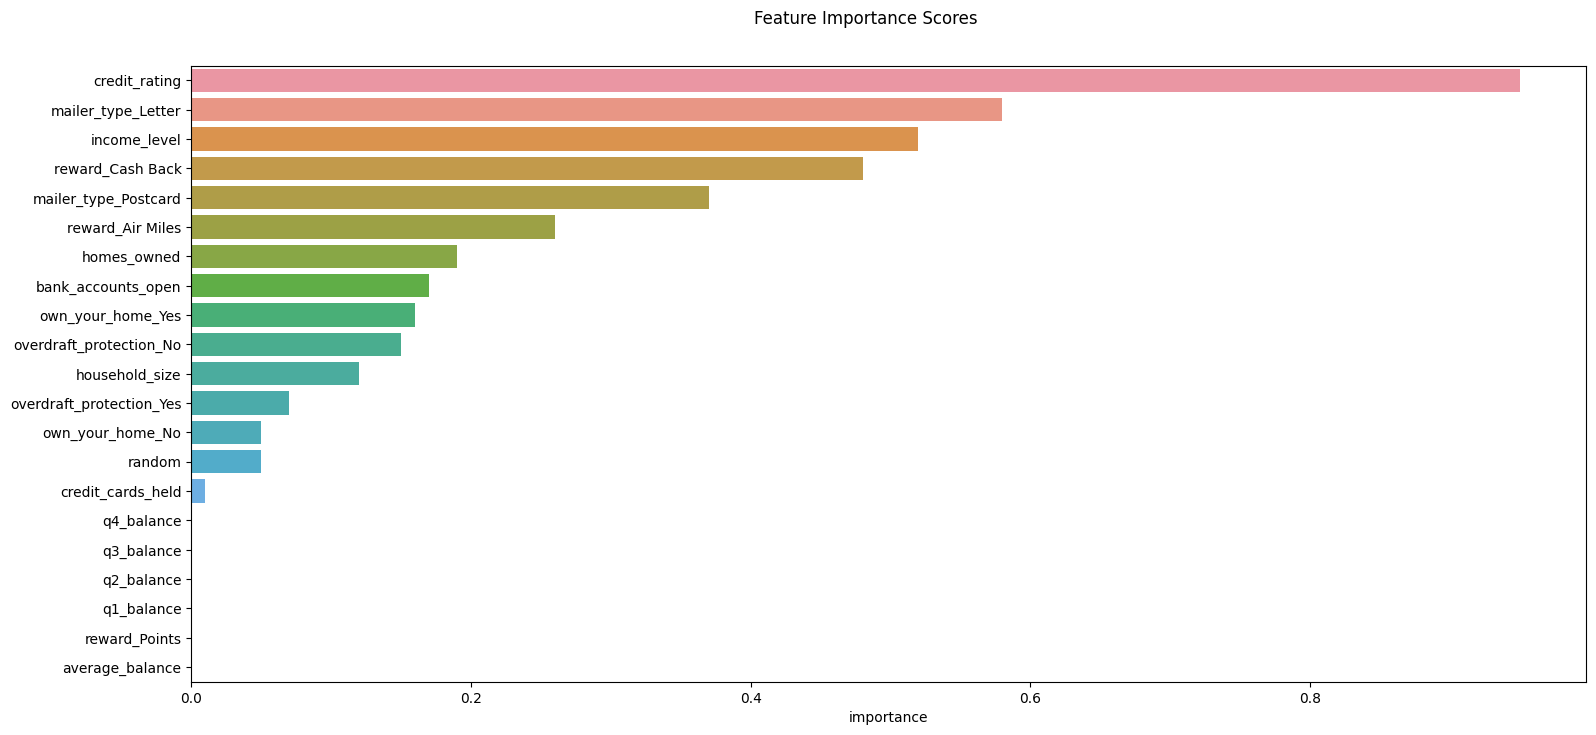

In [91]:
# Logistic Regression Feature Importance Scores
plot_importance(importance_log)

In [92]:
def metrics_class(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc_score = roc_auc_score(actual, predicted)
    
    index = ['Cohen Kappa Score', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC Score']
    metrics = pd.Series([kappa, accuracy, precision, recall, f1, auc_score], index=index)
    return metrics.round(2)


In [93]:
metrics_class(y_test, log_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

#### Logistic Regression with average_balance

In [94]:
log_pred_avg, importance_log_avg = fit_classifier(X_avgbal, y_int, 'logistic_b')
importance_log_avg

,importance
credit_rating,0.91
reward_Cash Back,0.68
mailer_type_Letter,0.62
income_level,0.47
reward_Air Miles,0.28
mailer_type_Postcard,0.27
random,0.25
own_your_home_Yes,0.23
overdraft_protection_No,0.20
overdraft_protection_Yes,0.15


<Axes: xlabel='importance'>

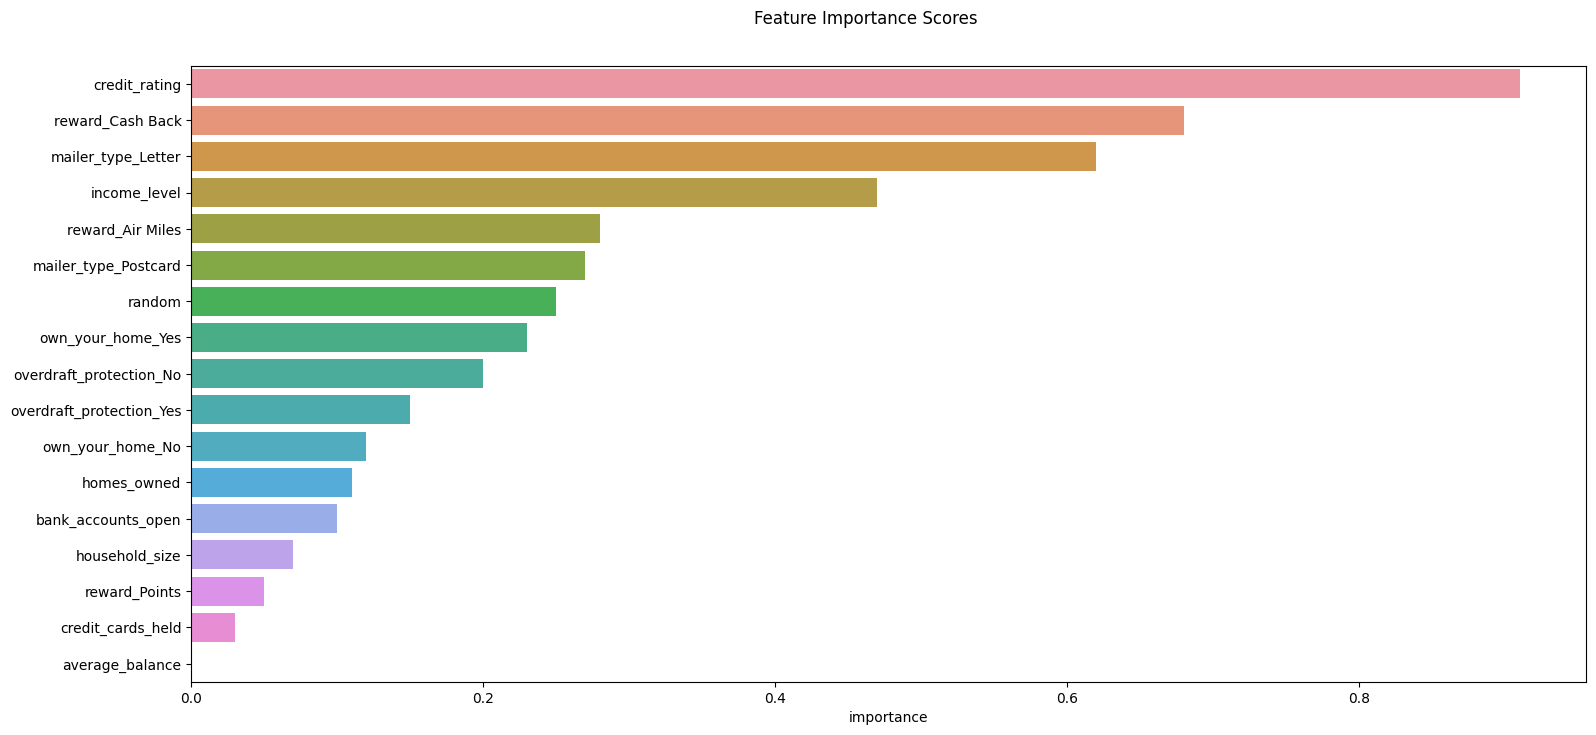

In [95]:
plot_importance(importance_log_avg)

In [96]:
metrics_class(y_test, log_pred_avg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

#### Logistic Regression with quarterly balance

In [97]:
log_pred_qr, importance_log_qr = fit_classifier(X_qr, y_int, 'logistic_b')
importance_log_qr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,importance
credit_rating,0.89
mailer_type_Letter,0.62
reward_Cash Back,0.60
income_level,0.51
mailer_type_Postcard,0.35
reward_Air Miles,0.30
own_your_home_Yes,0.18
homes_owned,0.17
overdraft_protection_No,0.17
bank_accounts_open,0.15


<Axes: xlabel='importance'>

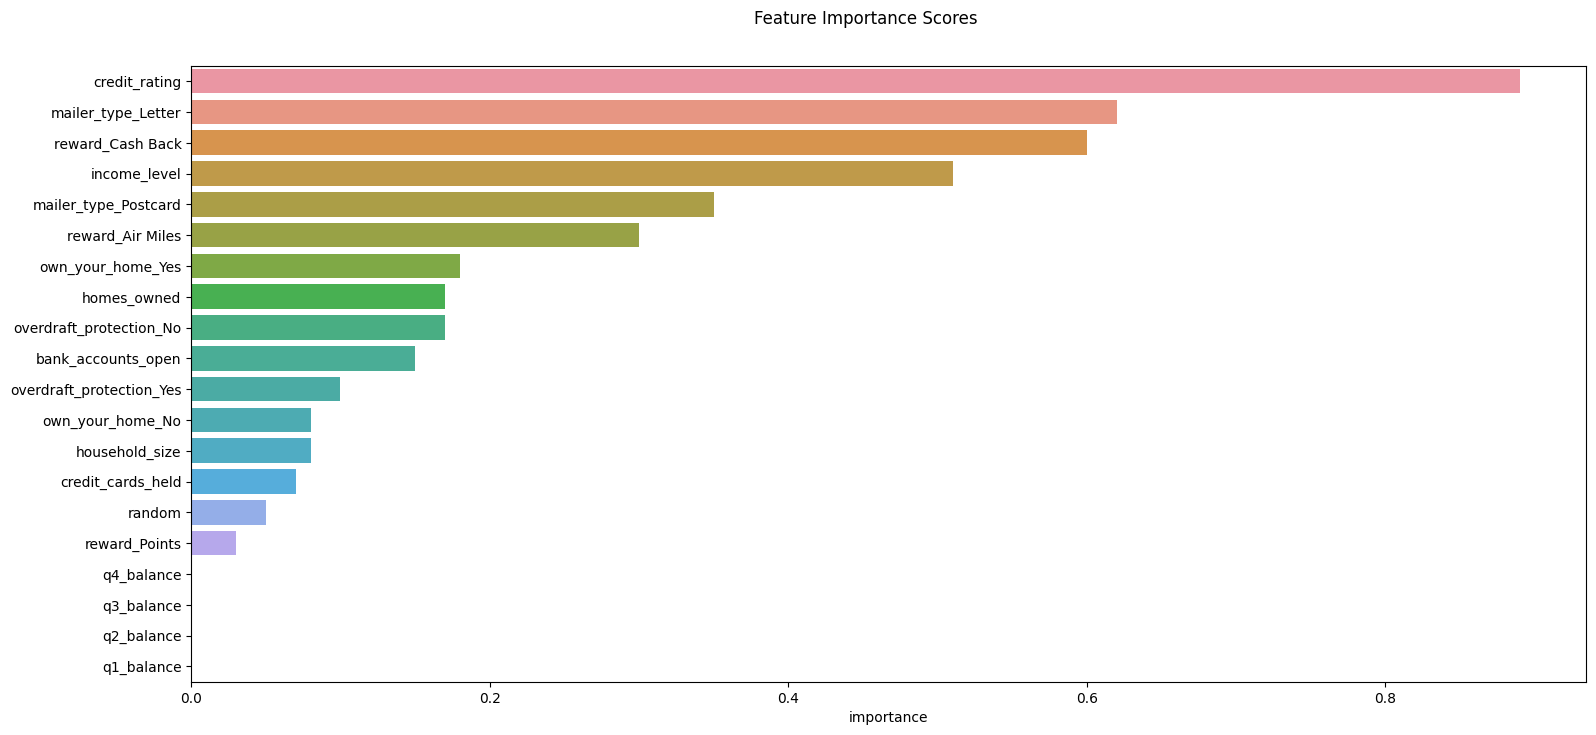

In [98]:
plot_importance(importance_log_qr)

In [99]:
metrics_class(y_test, log_pred_qr)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

#### Logistic Regression with SMOTE

In [100]:
sm_log_pred, sm_importance_log = fit_classifier(X_sm, y_sm, 'logistic_b')
sm_importance_log

,importance
credit_rating,0.90
income_level,0.47
reward_Cash Back,0.32
reward_Air Miles,0.26
mailer_type_Postcard,0.25
mailer_type_Letter,0.25
q1_balance,0.12
random,0.09
q2_balance,0.07
bank_accounts_open,0.07


In [101]:
metrics_class(ysm_test, sm_log_pred)

Cohen Kappa Score    0.41
Accuracy             0.70
Precision            0.68
Recall               0.74
F1                   0.71
AUC Score            0.70
dtype: float64

<Axes: xlabel='importance'>

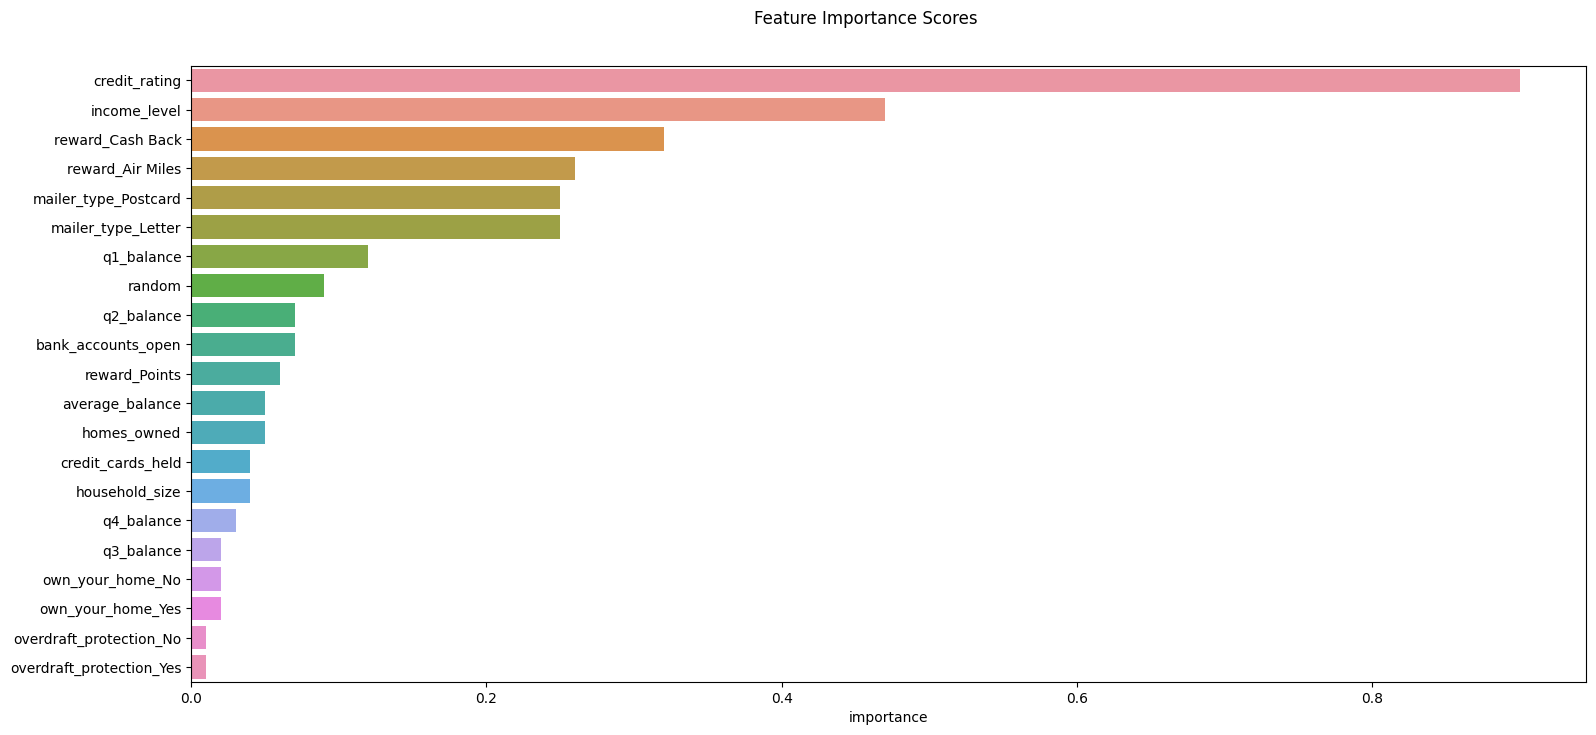

In [102]:
plot_importance(sm_importance_log)

### Decision Tree Classifier Model

In [103]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [104]:
metrics_class(y_test, dt_pred)

Cohen Kappa Score    0.05
Accuracy             0.89
Precision            0.10
Recall               0.13
F1                   0.11
AUC Score            0.53
dtype: float64

In [105]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
dt_entropy_pred = dt_entropy.predict(X_test)

In [106]:
metrics_class(y_test, dt_entropy_pred)

Cohen Kappa Score    0.08
Accuracy             0.90
Precision            0.12
Recall               0.14
F1                   0.13
AUC Score            0.54
dtype: float64

In [107]:
def importance(model):
    importances = pd.DataFrame(data=model.feature_importances_, columns=['importance'],
                        index= X_train.columns)
    importances_sorted = importances.sort_values('importance', ascending=False).round(3)
    return importances_sorted

In [108]:
importance_dt = importance(dt)
importance_dt

,importance
q1_balance,0.153
q3_balance,0.138
q2_balance,0.133
q4_balance,0.132
random,0.122
average_balance,0.096
household_size,0.056
income_level,0.026
credit_rating,0.025
credit_cards_held,0.022


<Axes: xlabel='importance'>

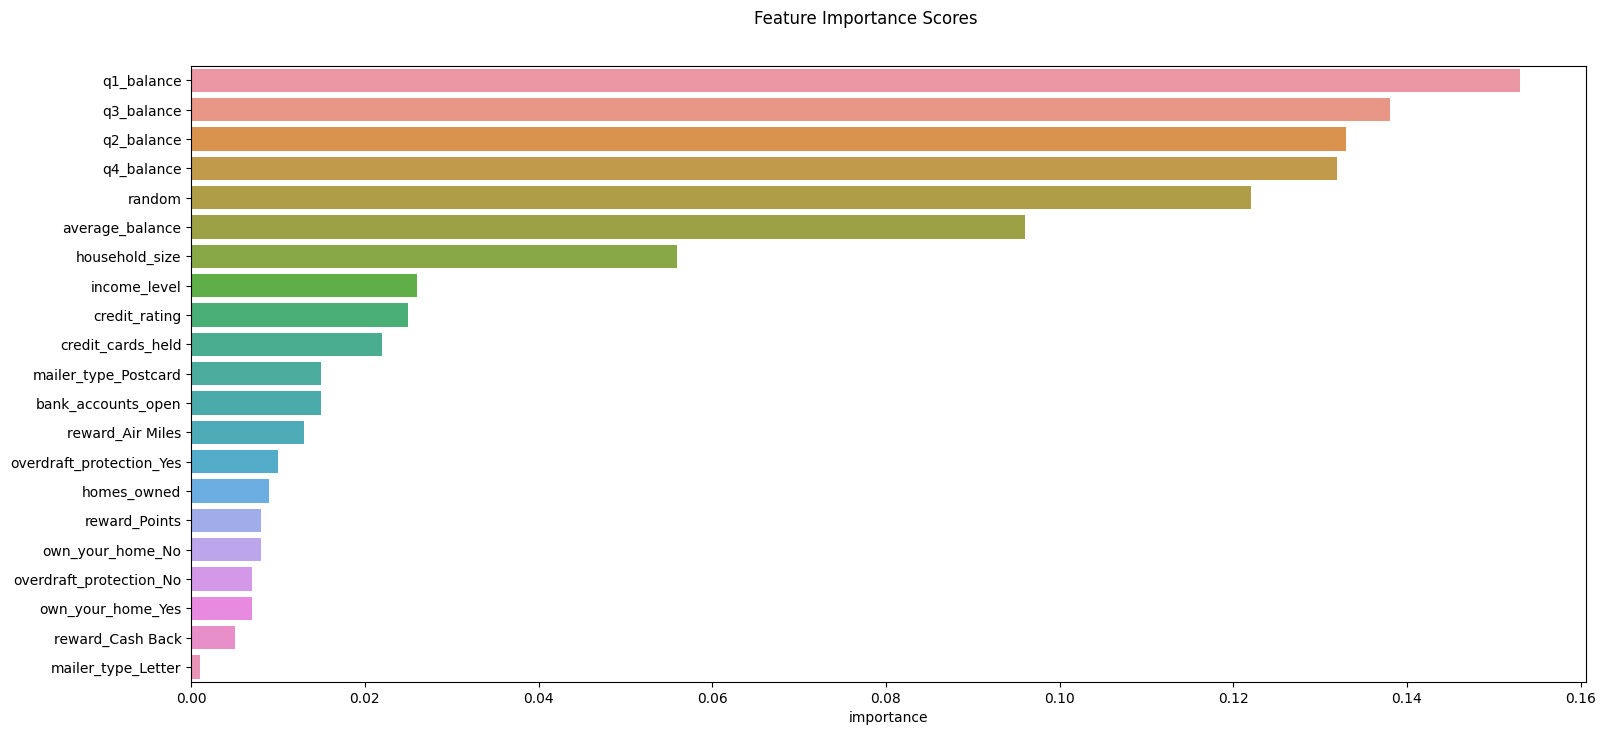

In [109]:
plot_importance(importance_dt)

In [110]:
imp_dt_ent = importance(dt_entropy)
imp_dt_ent

,importance
q4_balance,0.141
q1_balance,0.128
average_balance,0.127
q2_balance,0.123
random,0.110
q3_balance,0.108
credit_rating,0.055
household_size,0.044
income_level,0.025
credit_cards_held,0.023


<Axes: xlabel='importance'>

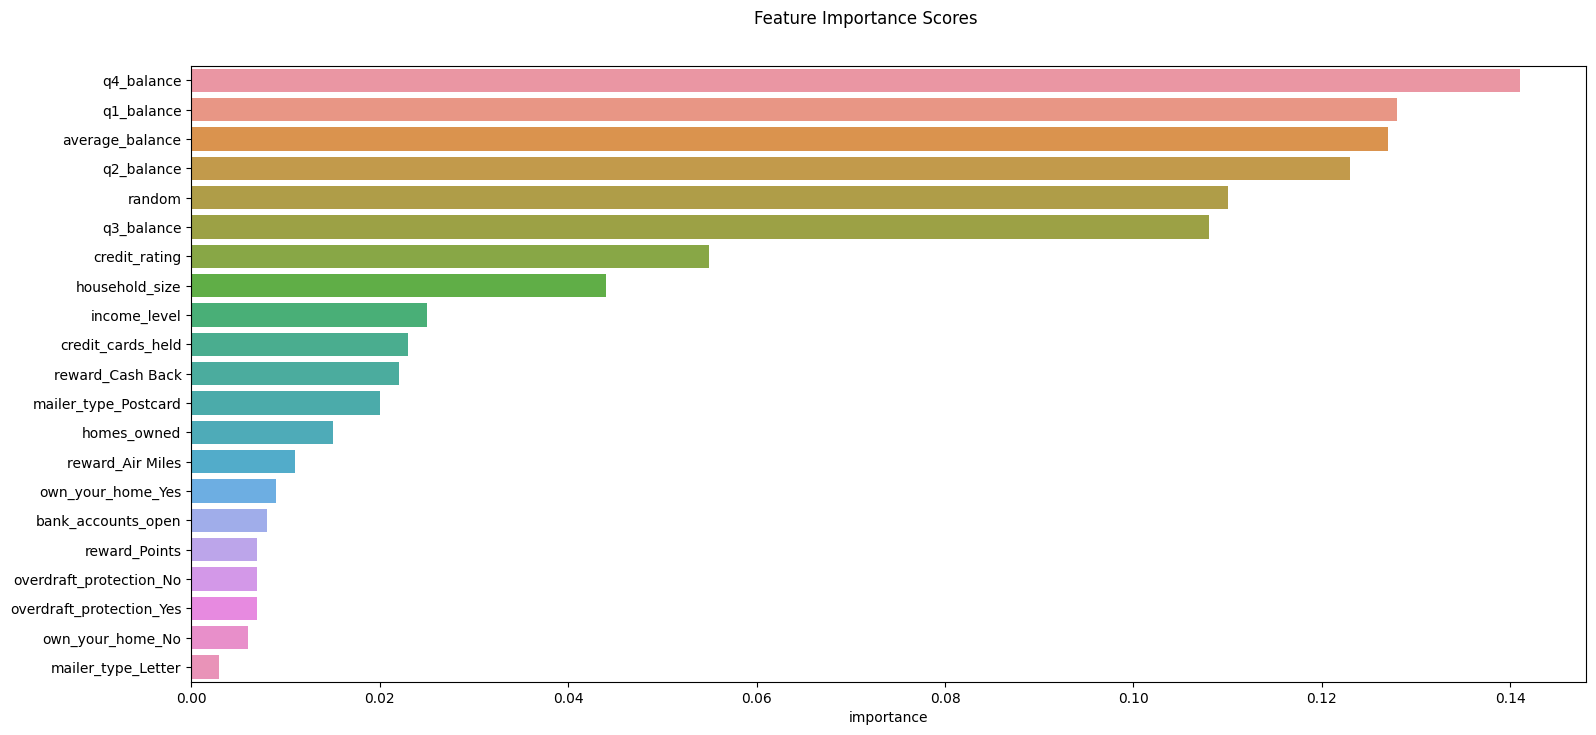

In [111]:
plot_importance(imp_dt_ent)

#### With SMOTE Dataset

In [112]:
dt.fit(Xsm_train, ysm_train)
sm_dt_pred = dt.predict(Xsm_test)

In [113]:
sm_dt_impt = importance(dt)
sm_dt_impt

,importance
credit_rating,0.366
income_level,0.152
household_size,0.063
credit_cards_held,0.062
q4_balance,0.046
q2_balance,0.045
q1_balance,0.042
average_balance,0.041
q3_balance,0.035
mailer_type_Letter,0.025


<Axes: xlabel='importance'>

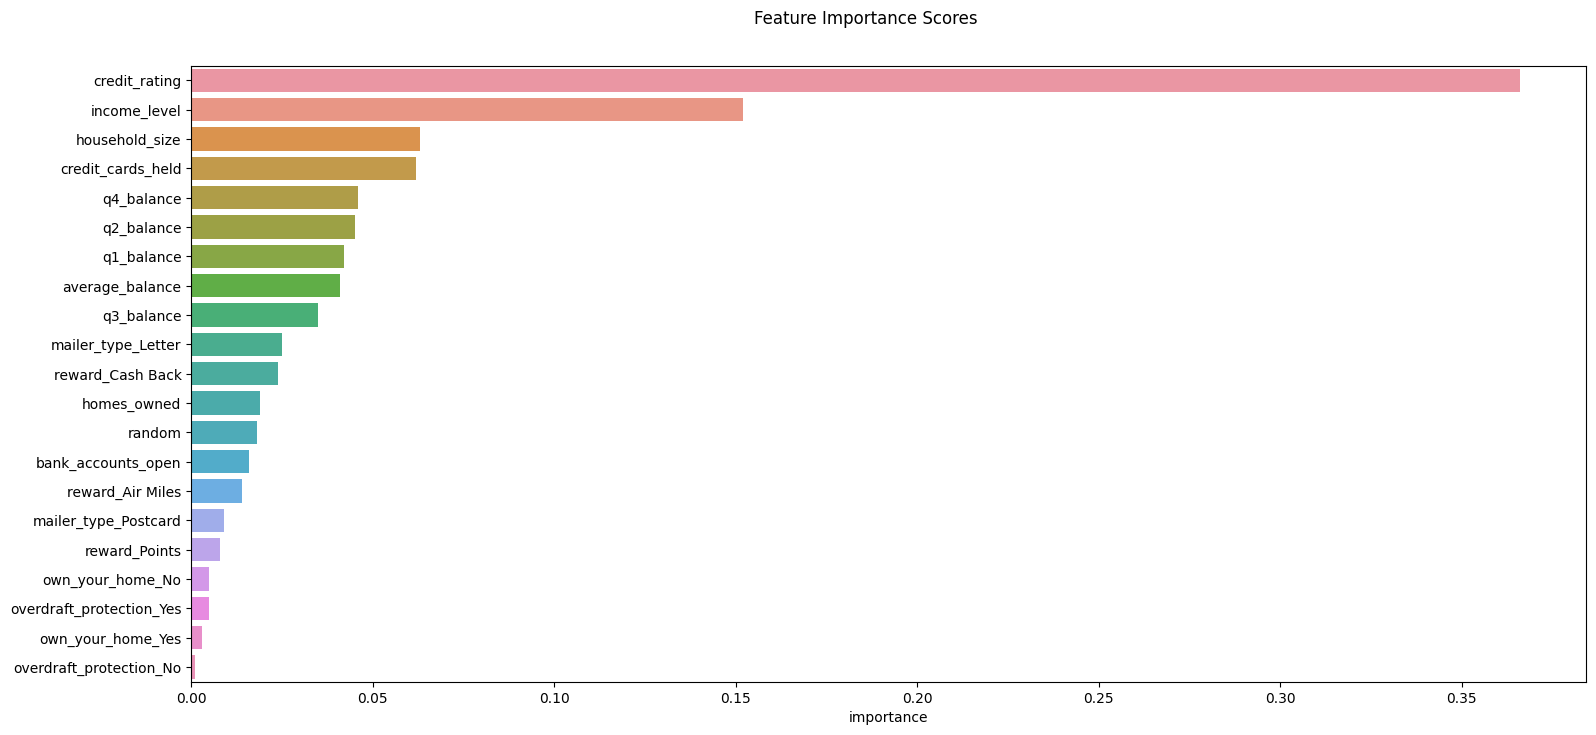

In [114]:
plot_importance(sm_dt_impt)

In [115]:
metrics_class(ysm_test, sm_dt_pred)

Cohen Kappa Score    0.84
Accuracy             0.92
Precision            0.91
Recall               0.93
F1                   0.92
AUC Score            0.92
dtype: float64

In [116]:
dt_entropy.fit(Xsm_train, ysm_train)
sm_dt_entropy_pred = dt_entropy.predict(Xsm_test)

In [117]:
sm_dtent_impt = importance(dt_entropy)
sm_dtent_impt


,importance
credit_rating,0.326
income_level,0.155
household_size,0.067
credit_cards_held,0.058
q4_balance,0.053
q2_balance,0.051
average_balance,0.044
q1_balance,0.044
q3_balance,0.041
reward_Cash Back,0.024


<Axes: xlabel='importance'>

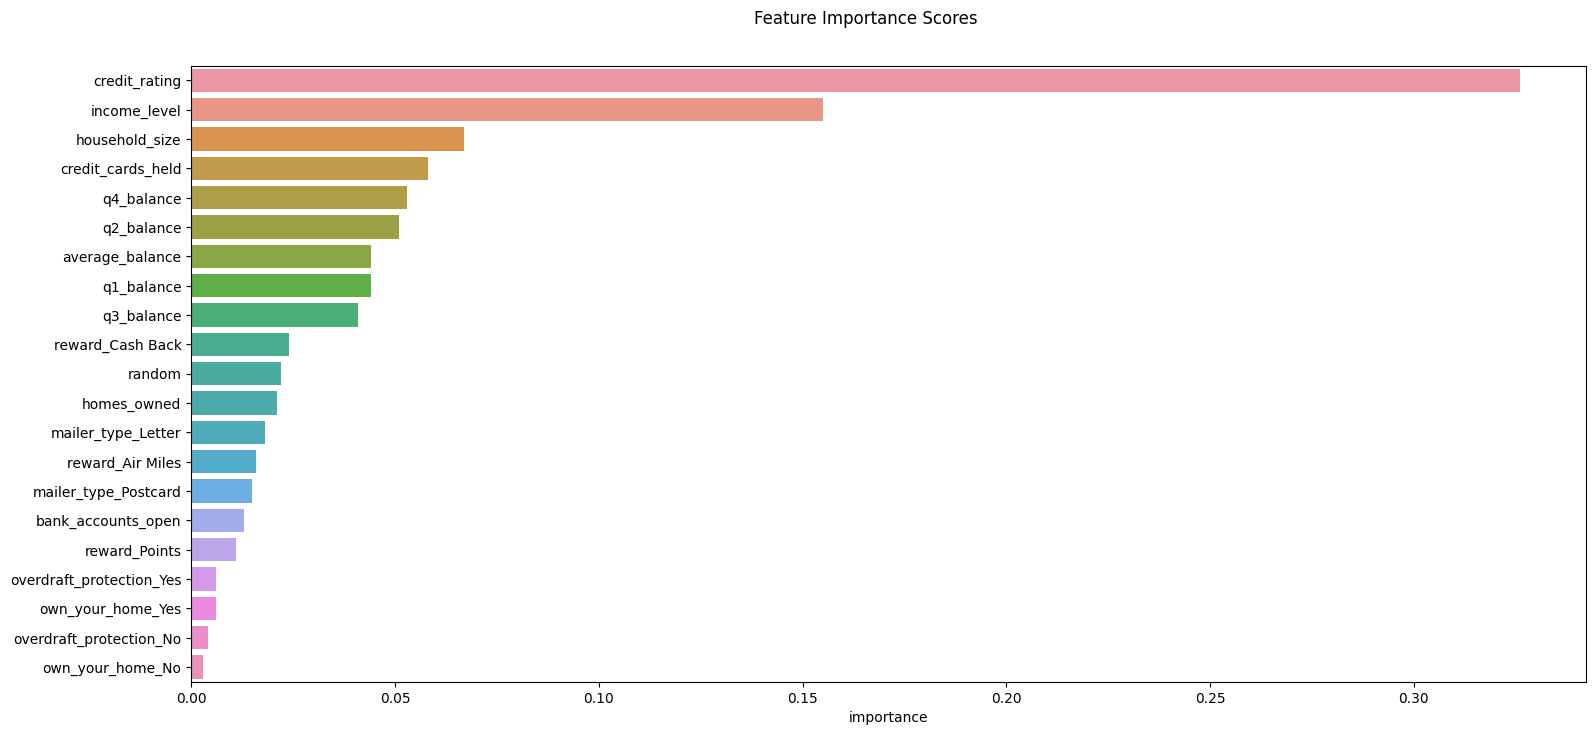

In [118]:
plot_importance(sm_dtent_impt)

In [119]:
metrics_class(ysm_test, sm_dt_entropy_pred)

Cohen Kappa Score    0.85
Accuracy             0.92
Precision            0.91
Recall               0.93
F1                   0.92
AUC Score            0.92
dtype: float64

### Random Forest Classifier

In [140]:
rf = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)
rf.fit(X_train,y_train)
print('Training Accuracy Score: {:.2f} \nOOB Score: {:.2f} \nValidation Accuracy Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

rf_pred = rf.predict(X_test)

Training Accuracy Score: 1.00 
OOB Score: 0.94 
Validation Accuracy Score: 0.94


In [141]:
def baseline_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred).round(3)


In [142]:
baseline_accuracy(rf, X_test, y_test)

0.944

In [143]:
imp_rf = importance(rf)
imp_rf

,importance
q1_balance,0.123
random,0.123
q3_balance,0.122
q2_balance,0.120
q4_balance,0.120
average_balance,0.118
household_size,0.053
credit_rating,0.036
credit_cards_held,0.033
income_level,0.027


<Axes: xlabel='importance'>

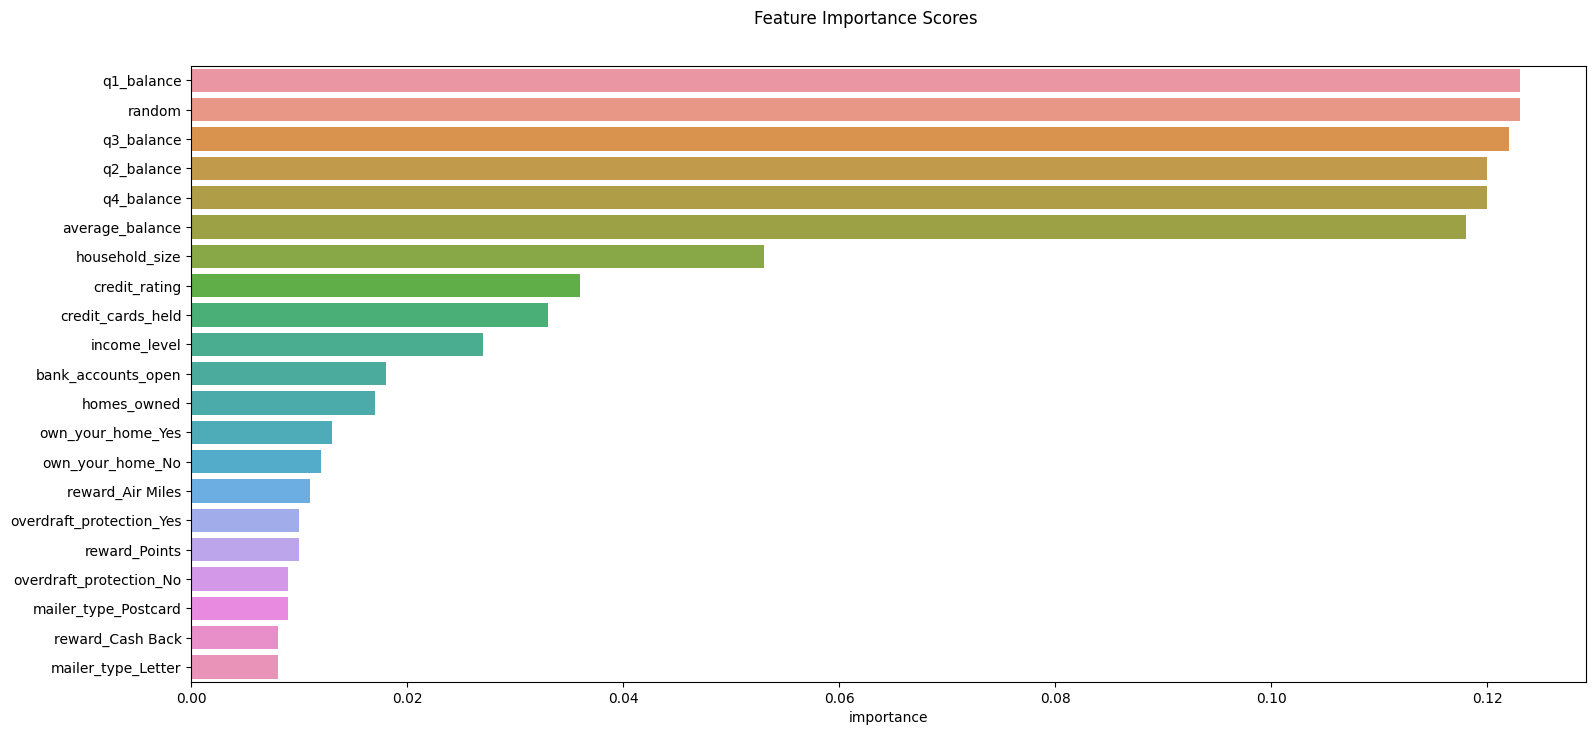

In [144]:
plot_importance(imp_rf)

> **Note:** Feature importance shows that the random variable is more important than the other features from the dataset which doesn't make sense. We will check permutation importance instead to see if the ranking will change.
> 
> The impurity-based feature importance ranks the numerical features to be the most important features. As a result, the non-predictive random_num variable is ranked as one of the most important features!
> This problem stems from two limitations of impurity-based feature importances:
>   - impurity-based importances are biased towards high cardinality features;
>   - impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity).
> 
> The bias towards high cardinality features explains why the random_num has a really large importance in comparison with random_cat while we would expect both random features to have a null importance.



In [145]:
from sklearn.inspection import permutation_importance

In [146]:
def perm_importance(model, X, y):
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    train_result = permutation_importance(
        rf, X_train, y_train, n_repeats=10, random_state=1, n_jobs=2
    )
    test_results = permutation_importance(
        rf, X_test, y_test, n_repeats=10, random_state=1, n_jobs=2
    )
    sorted_importances_idx = train_result.importances_mean.argsort()[::-1]
    train_importances = pd.DataFrame(
        train_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    test_importances = pd.DataFrame(
        test_results.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    return train_importances, test_importances

In [147]:
train_impt, test_impt = perm_importance(rf, X, y_int)

In [148]:
train_impt

,credit_rating,q3_balance,q1_balance,q2_balance,random,q4_balance,income_level,average_balance,mailer_type_Postcard,mailer_type_Letter,...,reward_Air Miles,household_size,credit_cards_held,reward_Points,homes_owned,own_your_home_No,own_your_home_Yes,bank_accounts_open,overdraft_protection_Yes,overdraft_protection_No
0,0.037908,0.032584,0.033219,0.031551,0.029325,0.028372,0.027736,0.029723,0.028451,0.025113,...,0.019868,0.016451,0.011047,0.008742,0.006199,0.006676,0.005722,0.004927,0.003338,0.002861
1,0.038226,0.030756,0.031551,0.030279,0.030915,0.030041,0.029802,0.029166,0.026623,0.023126,...,0.019232,0.014941,0.011841,0.008901,0.006278,0.005563,0.005722,0.005086,0.003258,0.002623
2,0.038544,0.032425,0.031630,0.030835,0.032345,0.029007,0.028372,0.029246,0.024795,0.021934,...,0.019948,0.016371,0.010172,0.008742,0.006994,0.005801,0.005245,0.004371,0.002940,0.002623
3,0.038067,0.031551,0.032504,0.032822,0.029325,0.028690,0.027974,0.028848,0.028292,0.025272,...,0.020742,0.015418,0.011126,0.008980,0.007232,0.005484,0.006199,0.005007,0.003497,0.003179
4,0.038782,0.033140,0.032186,0.032027,0.030835,0.029564,0.031948,0.028054,0.027021,0.024239,...,0.020186,0.016530,0.011206,0.009457,0.007391,0.005881,0.005643,0.004609,0.003497,0.002782
5,0.036875,0.031392,0.031630,0.029961,0.031153,0.029007,0.029246,0.029405,0.029087,0.025828,...,0.019471,0.016769,0.011206,0.007629,0.006040,0.006119,0.005881,0.004371,0.002940,0.002464
6,0.039736,0.033060,0.032981,0.031471,0.030835,0.029802,0.028928,0.029802,0.027656,0.025034,...,0.020583,0.015894,0.011444,0.008106,0.006596,0.005881,0.006358,0.004927,0.003258,0.002702
7,0.037193,0.032822,0.031789,0.029564,0.031312,0.030915,0.030041,0.029007,0.026544,0.024160,...,0.019471,0.014702,0.011444,0.007868,0.006517,0.005484,0.005166,0.004609,0.003338,0.002782
8,0.039100,0.034014,0.031709,0.030835,0.030517,0.030041,0.028054,0.029007,0.028213,0.024716,...,0.018994,0.016053,0.012636,0.008821,0.006278,0.005643,0.005563,0.005643,0.003258,0.003020
9,0.038782,0.031630,0.032345,0.030199,0.032027,0.030358,0.029882,0.028054,0.027021,0.024477,...,0.019471,0.017007,0.010808,0.008186,0.006040,0.006835,0.006358,0.004927,0.002861,0.002623


In [149]:
test_impt

,credit_rating,q3_balance,q1_balance,q2_balance,random,q4_balance,income_level,average_balance,mailer_type_Postcard,mailer_type_Letter,...,reward_Air Miles,household_size,credit_cards_held,reward_Points,homes_owned,own_your_home_No,own_your_home_Yes,bank_accounts_open,overdraft_protection_Yes,overdraft_protection_No
0,0.000000,-0.000185,0.000000,-0.000371,-0.000371,0.000000,0.000000,0.000185,-0.000185,-0.000185,...,0.0,-0.000371,0.000000,0.000000,0.000000,-0.000371,-0.000371,0.000000,-0.000185,0.0
1,-0.000371,-0.000185,-0.000371,-0.000371,0.000000,-0.000371,-0.000185,0.000000,-0.000371,-0.000371,...,0.0,-0.000371,0.000000,-0.000371,0.000000,0.000000,0.000000,0.000000,-0.000185,0.0
2,-0.000185,-0.000371,-0.000371,-0.000185,-0.000185,-0.000371,-0.000371,-0.000185,0.000000,0.000000,...,0.0,-0.000371,-0.000185,-0.000371,-0.000185,0.000000,0.000000,-0.000185,-0.000185,0.0
3,0.000000,-0.000371,-0.000371,-0.000185,-0.000185,-0.000371,-0.000185,-0.000371,-0.000371,-0.000371,...,0.0,-0.000371,0.000000,0.000000,0.000000,-0.000371,-0.000371,-0.000185,0.000000,0.0
4,-0.000185,-0.000371,-0.000371,-0.000185,0.000000,-0.000371,-0.000185,0.000185,-0.000185,-0.000185,...,0.0,-0.000371,0.000000,-0.000185,0.000000,-0.000371,-0.000371,0.000000,-0.000185,0.0
5,-0.000185,-0.000371,-0.000371,-0.000185,0.000000,-0.000185,-0.000371,0.000000,-0.000185,-0.000185,...,0.0,-0.000371,0.000000,-0.000185,0.000000,0.000000,0.000000,0.000000,-0.000185,0.0
6,-0.000185,-0.000371,-0.000371,-0.000185,-0.000185,-0.000371,-0.000371,0.000185,-0.000185,-0.000185,...,0.0,-0.000371,-0.000185,-0.000185,0.000000,-0.000371,-0.000371,-0.000185,-0.000185,0.0
7,0.000000,-0.000371,-0.000371,0.000000,-0.000185,-0.000185,-0.000371,0.000000,-0.000185,-0.000185,...,0.0,-0.000371,-0.000185,-0.000371,0.000000,0.000000,0.000000,-0.000185,-0.000185,0.0
8,-0.000371,-0.000371,-0.000185,-0.000185,0.000185,-0.000371,-0.000371,-0.000185,0.000000,0.000000,...,0.0,-0.000371,0.000000,-0.000185,0.000000,-0.000185,-0.000185,0.000000,-0.000185,0.0
9,-0.000185,-0.000371,-0.000371,-0.000185,0.000000,0.000185,-0.000371,0.000185,-0.000185,-0.000185,...,0.0,-0.000371,-0.000185,-0.000185,0.000000,-0.000371,-0.000371,-0.000185,0.000000,0.0


In [150]:
def plot_perm_impt(train_impt, test_impt):
    fig = plt.figure(figsize = (14,7))
    plt.suptitle("Permutation Importances", fontsize = 14, y=1)

    #  subplot #1
    plt.subplot(121)
    plt.title('Train Set')
    plt.xlabel("Decrease in accuracy score")
    ax = sns.boxplot(train_impt, orient='h', whis=10)
    ax.axvline(x=0, color="k", linestyle="--")
    
    #  subplot #2
    plt.subplot(122)
    plt.title('Test Set')
    plt.xlabel("Decrease in accuracy score")
    ax = sns.boxplot(test_impt, orient='h', whis=10)
    ax.axvline(x=0, color="k", linestyle="--")
    
    plt.tight_layout()
    plt.show()

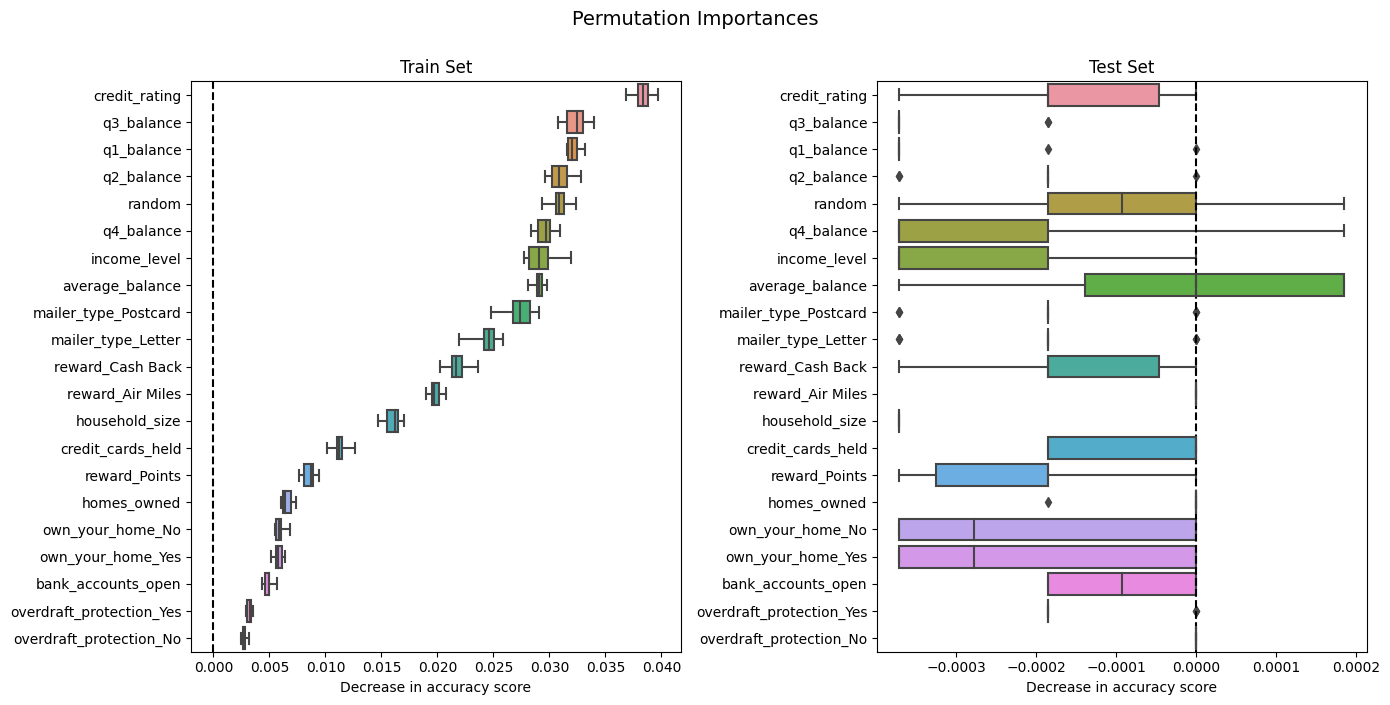

In [151]:
plot_perm_impt(train_impt, test_impt)

#### With SMOTE Dataset

In [152]:
rf.fit(Xsm_train,ysm_train)
sm_rf_pred = rf.predict(Xsm_test)
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(Xsm_train, ysm_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(Xsm_test, ysm_test)))

R^2 Training Score: 1.00 
OOB Score: 0.97 
R^2 Validation Score: 0.97


In [153]:
metrics_class(ysm_test, sm_rf_pred)

Cohen Kappa Score    0.94
Accuracy             0.97
Precision            0.97
Recall               0.96
F1                   0.97
AUC Score            0.97
dtype: float64

In [154]:
sm_imp_rf = importance(rf)
sm_imp_rf

,importance
credit_rating,0.232
income_level,0.128
household_size,0.089
credit_cards_held,0.077
q4_balance,0.057
q2_balance,0.055
q1_balance,0.053
q3_balance,0.052
average_balance,0.052
random,0.028


<Axes: xlabel='importance'>

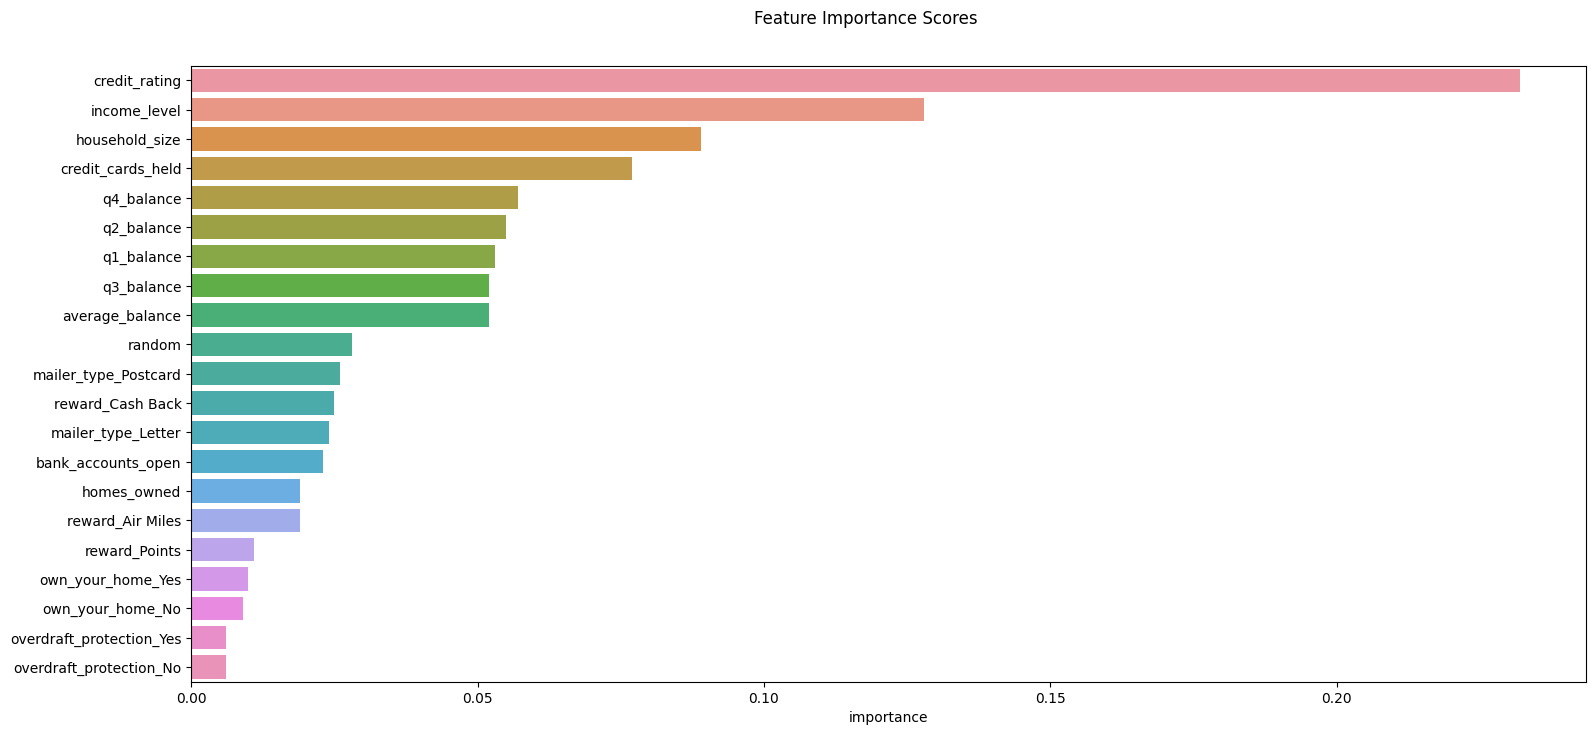

In [155]:
plot_importance(sm_imp_rf)

In [157]:
sm_train_impt, sm_test_impt = perm_importance(rf, X_sm, y_sm)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


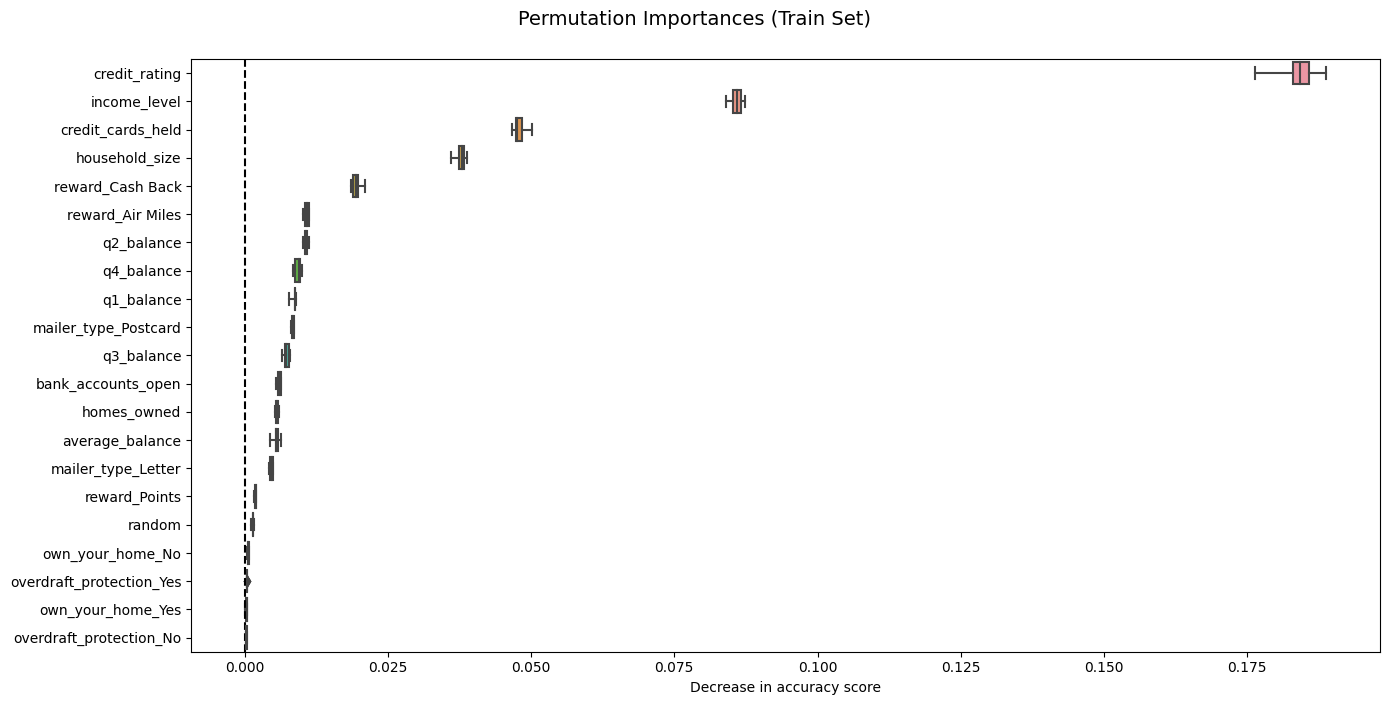

In [165]:
fig = plt.figure(figsize = (14,7))
plt.suptitle("Permutation Importances (Train Set)", fontsize = 14, y=1)
plt.xlabel("Decrease in accuracy score")
ax = sns.boxplot(sm_train_impt, orient='h', whis=10)
ax.axvline(x=0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

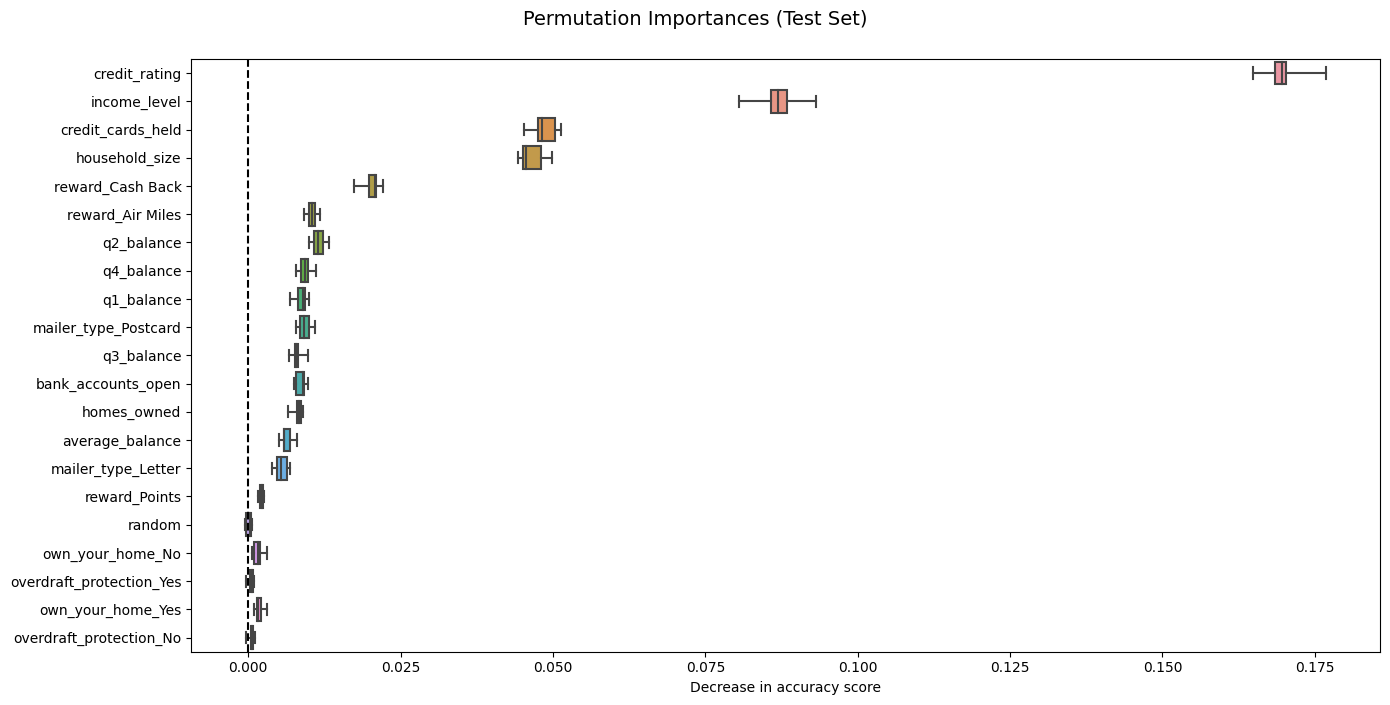

In [166]:
fig = plt.figure(figsize = (14,7))
plt.suptitle("Permutation Importances (Test Set)", fontsize = 14, y=1)
plt.xlabel("Decrease in accuracy score")
ax = sns.boxplot(sm_test_impt, orient='h', whis=10)
ax.axvline(x=0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

In [167]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dt_entropy_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, rf_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

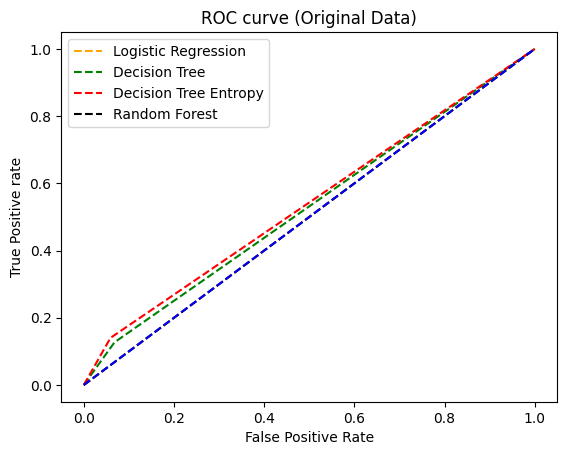

In [168]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Entropy')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve (Original Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_original',dpi=300)
plt.show();

In [169]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ysm_test, sm_log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ysm_test, sm_dt_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(ysm_test, sm_dt_entropy_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(ysm_test, sm_rf_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

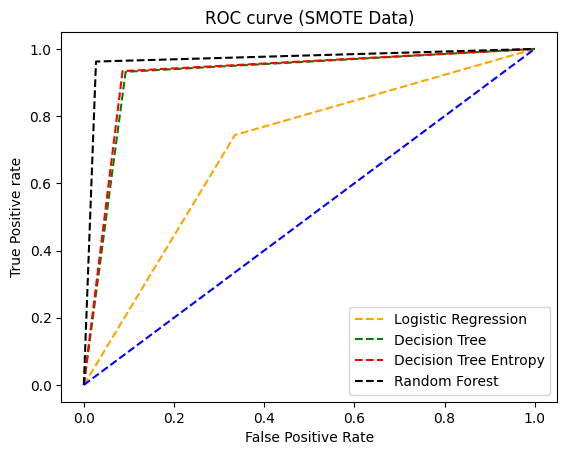

In [170]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree Entropy')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve (SMOTE Data)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_smotedata',dpi=300)
plt.show();